In [12]:
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [13]:
from matplotlib import rcParams
rcParams.update({
    "font.size": 14})

In [14]:
from BurgersNet import Net
from model_caching import save_model, load_model, get_model_name

In [15]:
def number_of_parameters(net):
    return sum([len(p) for p in net.parameters()])

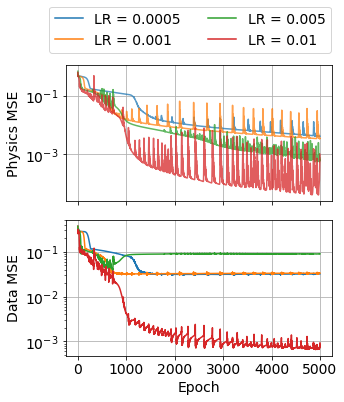

In [16]:
lrs = [0.0005, 0.001, 0.005, 0.01]

f, ax = plt.subplots(2, figsize=(5,5), sharex=True)
for i, lr in enumerate(lrs):
    M, losses = load_model(learning_rate=lr, act_func = nn.Tanh())
    loss_data, loss_pde, loss_bc, loss_ic = losses
    plt.subplot(2, 1, 1)
    plt.semilogy(loss_pde + loss_bc + loss_ic, alpha=0.75)
    plt.ylabel('Physics MSE')
    plt.grid()

    plt.subplot(2, 1, 2)
    plt.semilogy(loss_data, label='LR = ' + str(lr))
    plt.ylabel('Data MSE')
    plt.xlabel('Epoch')
    plt.grid()

ax[0].grid()
ax[1].grid()
f.legend(loc='upper center', bbox_to_anchor=(0.55, 1.14), ncol=2)
plt.tight_layout()
f.savefig('./figs/hyperparams/hyperparam_lr.pdf', dpi=600, bbox_inches = 'tight')
plt.show()


In [17]:
act_funcs = [nn.Tanh(), nn.Sigmoid(), nn.Tanhshrink(), nn.ReLU()]

f, ax = plt.subplots(2, figsize=(5,5), sharex=True)
for i, act_func in enumerate(act_funcs):
    M, losses = load_model(act_func = act_func)
    loss_data, loss_pde, loss_bc, loss_ic = losses
    plt.subplot(2, 1, 1)
    plt.semilogy(loss_pde + loss_bc + loss_ic)
    plt.ylabel('Physics MSE')
    plt.grid()

    plt.subplot(2, 1, 2)
    plt.semilogy(loss_data, label=str(act_func)[:-2])
    plt.ylabel('Data MSE')
    plt.xlabel('Epoch')
    plt.grid()

ax[0].grid()
ax[1].grid()
f.legend(loc='upper center', bbox_to_anchor=(0.55, 1.14), ncol=2)
plt.tight_layout()
f.savefig('./figs/hyperparams/hyperparam_act_func.pdf', dpi=600, bbox_inches = 'tight')
plt.show()


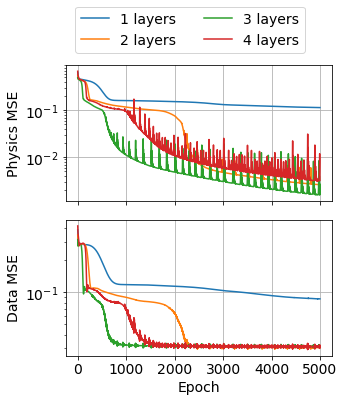

In [ ]:
layers = [1, 2, 3, 4]

f, ax = plt.subplots(2, figsize=(5,5), sharex=True)
for i, N_layers in enumerate(layers):
    net, losses = load_model(N_layers = N_layers, act_func=nn.Tanh())
    loss_data, loss_pde, loss_bc, loss_ic = losses
    plt.subplot(2, 1, 1)
    plt.semilogy(loss_pde + loss_bc + loss_ic)
    plt.ylabel('Physics MSE')
    plt.grid()

    plt.subplot(2, 1, 2)
    plt.semilogy(loss_data, label=str(N_layers) + ' layers')
    plt.ylabel('Data MSE')
    plt.xlabel('Epoch')
    plt.grid()

ax[0].grid()
ax[1].grid()
f.legend(loc='upper center', bbox_to_anchor=(0.55, 1.14), ncol=2)
plt.tight_layout()
f.savefig('./figs/hyperparams/hyperparam_n_layers.pdf', dpi=600, bbox_inches = 'tight')
plt.show()


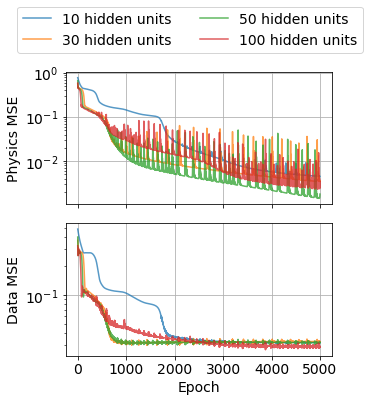

In [ ]:
N_hids = [10, 30, 50, 100]

f, ax = plt.subplots(2, figsize=(5,5), sharex=True)
for N_hid in N_hids:
    net, losses = load_model(N_hid = N_hid, act_func=nn.Tanh())
    loss_data, loss_pde, loss_bc, loss_ic = losses
    plt.subplot(2, 1, 1)
    plt.semilogy(loss_pde + loss_bc + loss_ic, alpha=0.75)
    plt.ylabel('Physics MSE')
    plt.grid()

    plt.subplot(2, 1, 2)
    plt.semilogy(loss_data, label=str(N_hid) + ' hidden units', alpha=0.75)
    plt.ylabel('Data MSE')
    plt.xlabel('Epoch')
    plt.grid()

ax[0].grid()
ax[1].grid()
f.legend(loc='upper center', bbox_to_anchor=(0.55, 1.14), ncol=2)
plt.tight_layout()
f.savefig('./figs/hyperparams/hyperparam_n_hid.pdf', dpi=600, bbox_inches = 'tight')
plt.show()
